In [1]:
!pip install opencv-python numpy
import cv2
print(cv2.__version__)

4.10.0


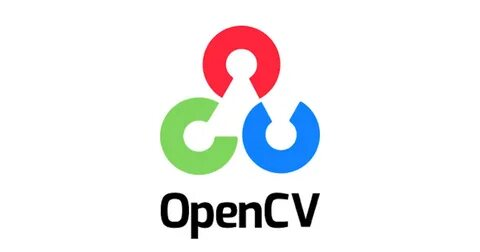

In [2]:
import numpy as np
import cv2
import requests
from google.colab.patches import cv2_imshow

# Чтение изображения
img = cv2.imread('messi5.jpg',0)

# URL изображения
url = 'https://avatars.mds.yandex.net/i?id=bb847de0cfb85fb2220858d0ecaef46d3bb3acf3-4866855-images-thumbs&n=13'

# Загрузка изображения с помощью requests
response = requests.get(url)
img_array = np.frombuffer(response.content, np.uint8)

# Чтение изображения с помощью OpenCV
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

cv2_imshow(img)
# cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
import numpy as np
import cv2
img = cv2.imread('messi5.jpg',0)
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27:
  # wait for ESC key to exit
  cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
cv2.imwrite('messigray.png',img)
cv2.destroyAllWindows()

IndentationError: expected an indented block after 'elif' statement on line 9 (<ipython-input-1-31bb8bc285df>, line 10)

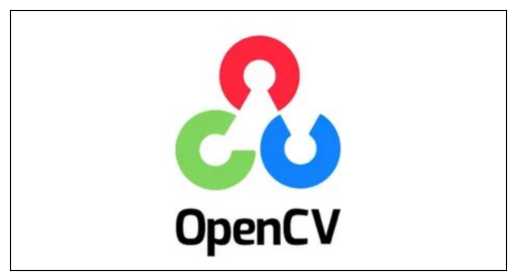

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import requests

# img = cv2.imread('messi5.jpg',0)

# URL изображения
url = 'https://avatars.mds.yandex.net/i?id=bb847de0cfb85fb2220858d0ecaef46d3bb3acf3-4866855-images-thumbs&n=13'

# Загрузка изображения с помощью requests
response = requests.get(url)
img_array = np.frombuffer(response.content, np.uint8)

# Чтение изображения с помощью OpenCV
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img, cmap = 'gray', interpolation = 'bicubic')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

**Захват камеры**

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        # When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

**Захват видео**

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture('дрифт.mp4')

if not cap.isOpened():
    print("Error: Could not open video.")
else:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Error: Could not read frame.")
            break

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('frame', gray)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()


**Сохранение видео**

In [ ]:
import numpy as np
import cv2

cap = cv2.VideoCapture('дрифт.mp4')

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi',fourcc, 20.0, (640,480))
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret==True:
        frame = cv2.flip(frame,0)
        # write the flipped frame
        out.write(frame)
        cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
# Release everything if job is finished
cap.release()
cv2.destroyAllWindows()


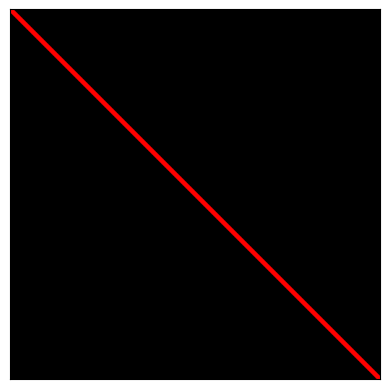

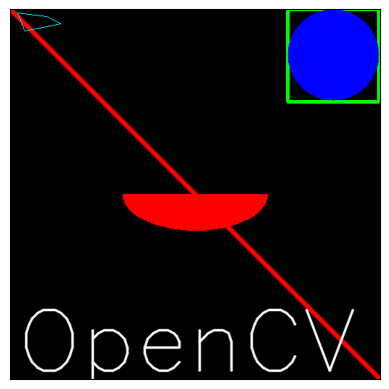

In [10]:
import numpy as np
import cv2
# Create a black image
img = np.zeros((512,512,3), np.uint8)
# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,(0,0),(511,511),(255,0,0),5)

plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

img = cv2.rectangle(img,(384,0),(510,128),(0,255,0),3)

img = cv2.circle(img,(447,63), 63, (0,0,255), -1)

img = cv2.ellipse(img,(256,256),(100,50),0,0,180,255,-1)
# Рисование многоугольника
pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
img = cv2.polylines(img,[pts],True,(0,255,255))
# Рисование слов
font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(img,'OpenCV',(10,500), font, 4,(255,255,255),2,cv2.LINE_AA)

plt.imshow(img, cmap = 'gray')
plt.xticks([]), plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

**Рисовать круги на фотографии двойным щелчком**

In [ ]:
>>> import cv2
>>> events = [i for i in dir(cv2) if 'EVENT' in i]
>>> print events

In [ ]:
import cv2
import numpy as np

# mouse callback function
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img, (x, y), 100, (255, 0, 0), -1)

# Create a black image, a window and bind the function to window
img = np.zeros((512, 512, 3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)

while True:
    cv2.imshow('image', img)
    if cv2.waitKey(20) & 0xFF == 27:  # Press 'Esc' to exit
        break

cv2.destroyAllWindows()

**Продвинутая версия рисования. m смена режима**

In [ ]:
import cv2
import numpy as np

# Переменные для хранения состояния рисования
drawing = False  # True, если мышь нажата
mode = True  # Если True, рисуем прямоугольник. Нажмите 'm' для переключения на кривую
ix, iy = -1, -1  # Координаты начала рисования

# Функция обратного вызова для событий мыши
def draw_circle(event, x, y, flags, param):
    global ix, iy, drawing, mode

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y

    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            if mode:
                cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), -1)
            else:
                cv2.circle(img, (x, y), 5, (0, 0, 255), -1)

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        if mode:
            cv2.rectangle(img, (ix, iy), (x, y), (0, 255, 0), -1)
        else:
            cv2.circle(img, (x, y), 5, (0, 0, 255), -1)

# Создаем черное изображение, окно и привязываем функцию обратного вызова к окну
img = np.zeros((512, 512, 3), np.uint8)
cv2.namedWindow('image')
cv2.setMouseCallback('image', draw_circle)

while True:
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:  # Нажатие 'Esc' для выхода
        break
    elif k == ord('m'):  # Нажатие 'm' для переключения режима
        mode = not mode

cv2.destroyAllWindows()

**RGB color визуализатор**

In [ ]:
import cv2
import numpy as np

def nothing(x):
    pass

# Create a black image, a window
img = np.zeros((300, 512, 3), np.uint8)
cv2.namedWindow('image')

# create trackbars for color change
cv2.createTrackbar('R', 'image', 0, 255, nothing)
cv2.createTrackbar('G', 'image', 0, 255, nothing)
cv2.createTrackbar('B', 'image', 0, 255, nothing)

# create switch for ON/OFF functionality
switch = '0 : OFF \n1 : ON'
cv2.createTrackbar(switch, 'image', 0, 1, nothing)

while True:
    cv2.imshow('image', img)
    k = cv2.waitKey(1) & 0xFF
    if k == 27:  # Нажатие 'Esc' для выхода
        break

    # get current positions of four trackbars
    r = cv2.getTrackbarPos('R', 'image')
    g = cv2.getTrackbarPos('G', 'image')
    b = cv2.getTrackbarPos('B', 'image')
    s = cv2.getTrackbarPos(switch, 'image')

    if s == 0:
        img[:] = 0
    else:
        img[:] = [b, g, r]

cv2.destroyAllWindows()


**Добавление отрезка фото из самой фотографии. !ОЧЕНЬ ДОЛГАЯ РАБОТА!**

In [ ]:
import cv2
import numpy as np

# Создаем черное изображение
img = np.zeros((512, 512, 3), np.uint8)

# Вырезаем часть изображения (например, "мяч")
ball = img[280:340, 330:390].copy()  # Используем .copy(), чтобы создать независимую копию

# Изменяем цвет "мяча" на синий (например)
ball[:, :] = [255, 0, 0]  # Синий цвет в формате BGR

# Вставляем эту часть в другую область изображения
img[273:333, 100:160] = ball

# Разделяем изображение на каналы
b, g, r = cv2.split(img)

# Объединяем каналы обратно в изображение
img = cv2.merge((b, g, r))

# Отображаем изображение
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


**Рамка**

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0]

img1 = cv2.imread('pp.jpg')

replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()

**x+y=4. так как 250 + 10 = 260, и при переполнении uint8 значение обрезается до 4**

In [ ]:
import cv2
import numpy as np

# Создаем массивы с значениями 250 и 10
x = np.uint8([250])
y = np.uint8([10])

# Используем cv2.add для сложения
result_cv2_add = cv2.add(x, y)
print("cv2.add(x, y):", result_cv2_add)  # Ожидаемый результат: 255

# Используем обычное сложение NumPy
result_numpy_add = x + y
print("x + y:", result_numpy_add)  # Ожидаемый результат: 4

**Смешивание изображений. Resize**

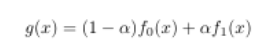

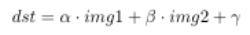

Это также добавление изображений, но изображениям присваиваются другие значения, чтобы создать ощущение смешивания или
прозрачности. Изображения добавляются в соответствии с приведенным ниже уравнением:

g(x) = (1−a)*f0(x) + a*f1(x)

Изменяя значение от 0 до 1, вы можете выполнить плавный переход от одного изображения к другому.

Здесь я взял два изображения, чтобы смешать их вместе. Первому изображению присвоен вес 0,7, а второму - 0,3.

cv2.Функция addWeighted() применяет к изображению следующее уравнение.

In [ ]:
import cv2
import numpy as np

img1 = cv2.imread('pp.jpg')
img2 = cv2.imread('opencv.jpg')

img1 = cv2.resize(img1, (180, 180))
img2 = cv2.resize(img2, (180, 180))

dst = cv2.addWeighted(img1,0.7,img2,0.3,0)

cv2.imshow('dst',dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

**Цветовая маска**

In [ ]:
import cv2
import numpy as np

# Захват видео с веб-камеры
cap = cv2.VideoCapture(0)

while True:
    # Захват кадра
    _, frame = cap.read()

    # Преобразование BGR в HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Определение диапазона синего цвета в HSV
    lower_blue = np.array([110, 50, 50])
    upper_blue = np.array([130, 255, 255])

    # Пороговая обработка HSV изображения для получения только синих цветов
    mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Побитовое И между маской и оригинальным изображением
    res = cv2.bitwise_and(frame, frame, mask=mask)

    # Отображение оригинального кадра, маски и результата
    cv2.imshow('frame', frame)
    cv2.imshow('mask', mask)
    cv2.imshow('res', res)

    # Выход из цикла при нажатии клавиши 'Esc'
    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

# Освобождение ресурсов и закрытие всех окон
cap.release()
cv2.destroyAllWindows()

**Обработка изображений в OpenCV**

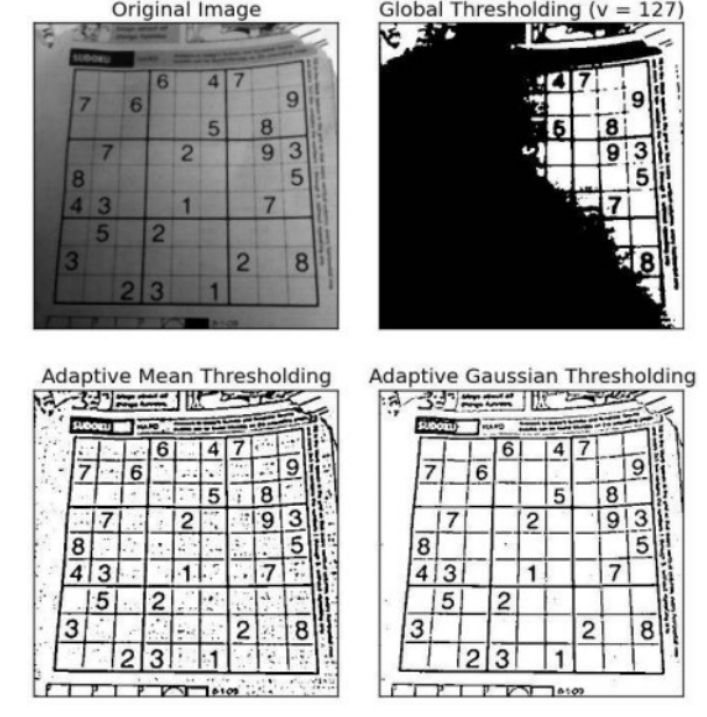

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Загрузка изображения в оттенках серого
img = cv2.imread('opencv.jpg', 0)

# Применение медианного размытия
img = cv2.medianBlur(img, 5)

# Глобальная пороговая обработка
ret, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Адаптивная пороговая обработка с использованием среднего значения
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY, 11, 2)

# Адаптивная пороговая обработка с использованием гауссового значения
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY, 11, 2)

# Заголовки для изображений
titles = ['Original Image', 'Global Thresholding (v = 127)',
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']

# Список изображений
images = [img, th1, th2, th3]

# Отображение изображений с помощью Matplotlib
for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


**Избавление от шумов**

Смотрите пример ниже. Входное изображение является зашумленным.

В первом случае я применил глобальное пороговое значение для значения 127

во втором случае я применил пороговое значение Otsu напрямую.

В третьем случае я отфильтровал изображение с помощью гауссовского ядра 5x5
, чтобы удалить шум, а затем применил пороговое значение Otsu. Посмотрите, как фильтрация шума улучшает результат.
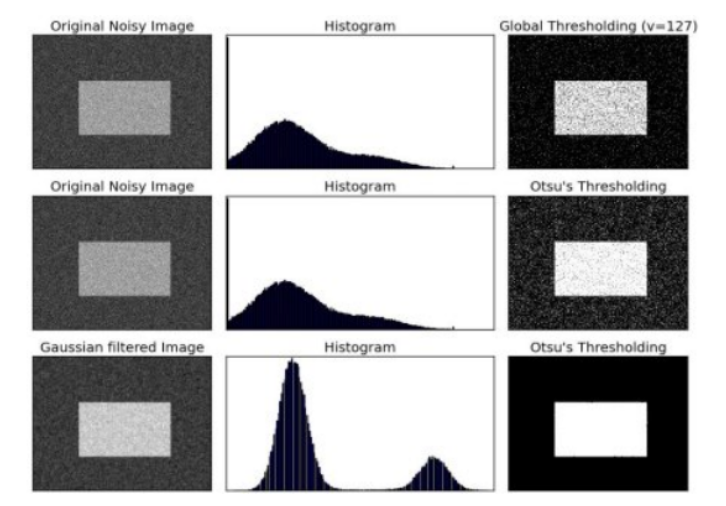

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Загрузка изображения в оттенках серого
img = cv2.imread('noisy2.png', 0)

# Глобальная пороговая обработка
ret1, th1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

# Пороговая обработка методом Оцу
ret2, th2 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Пороговая обработка методом Оцу после гауссового размытия
blur = cv2.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Список изображений и гистограмм
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]

# Заголовки для изображений и гистограмм
titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding (v=127)',
          'Original Noisy Image', 'Histogram', "Otsu's Thresholding",
          'Gaussian filtered Image', 'Histogram', "Otsu's Thresholding"]

# Отображение изображений и их гистограмм с помощью Matplotlib
for i in range(3):
    plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(images[i * 3], 'gray')
    plt.title(titles[i * 3])
    plt.xticks([]), plt.yticks([])

    plt.subplot(3, 3, i * 3 + 2)
    plt.hist(images[i * 3].ravel(), 256)
    plt.title(titles[i * 3 + 1])
    plt.xticks([]), plt.yticks([])

    plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(images[i * 3 + 2], 'gray')
    plt.title(titles[i * 3 + 2])
    plt.xticks([]), plt.yticks([])

plt.show()

**Афинное смещение**

Предупреждение:

Третьим аргументом функции cv2.warpAffine() является размер выходного изображения, который должен быть в виде (ширина, высота). Помните, что ширина = количество столбцов, а высота = количество строк.

In [ ]:
import cv2
import numpy as np

# Загрузка изображения в оттенках серого
img = cv2.imread('opencv.jpg', 0)

# Получение размеров изображения
rows, cols = img.shape

# Создание матрицы аффинного преобразования
M = np.float32([[1, 0, 100], [0, 1, 50]])

# Применение аффинного преобразования
dst = cv2.warpAffine(img, M, (cols, rows))

# Отображение результата
cv2.imshow('img', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

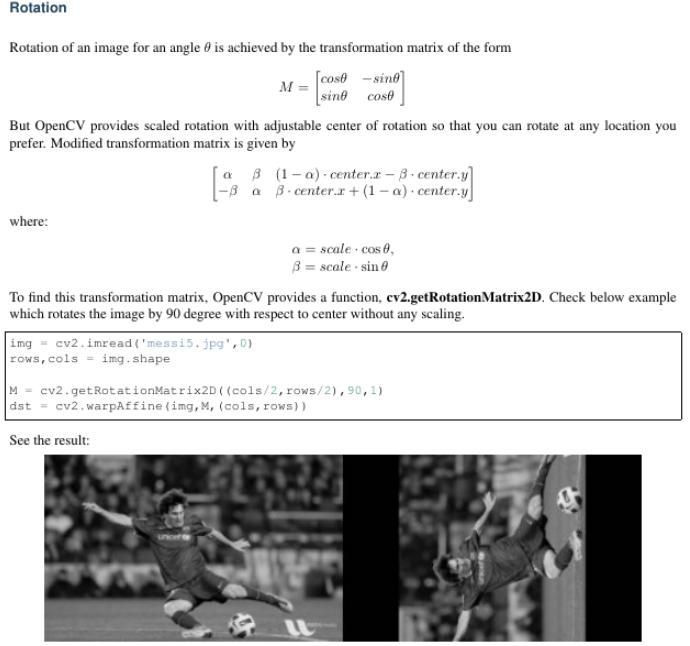

**Афинное преобразование**

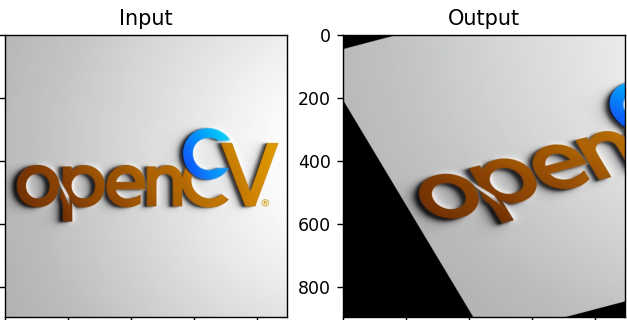

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('opencv.jpg')

rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])

pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

**Перспективное преобразование**

Для перспективного преобразования вам понадобится матрица преобразования 3х3. Прямые линии останутся прямыми даже после
преобразования. Чтобы найти эту матрицу преобразования, вам понадобятся 4 точки на входном изображении и соответствующие точки
на выходном изображении. Из этих 4 точек 3 не должны быть коллинеарными. Матрицу преобразования можно
найти с помощью функции cv2.getPerspectiveTransform. Затем примените cv2.warpPerspective к этой
матрице преобразования 3x3.

Смотрите код ниже:

In [ ]:
img = cv2.imread('sudokusmall.png')

rows,cols,ch = img.shape

pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(300,300))

plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

**2D свертка (фильтрация изображений)**

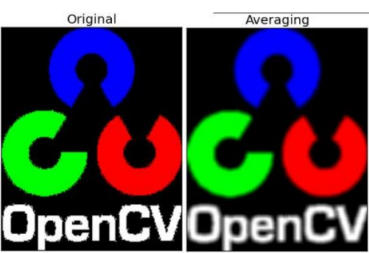

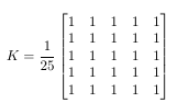

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('opencv.jpg')

kernel = np.ones((5,5),np.float32)/25

dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

**Размытие изображения (Сглаживание изображения)**

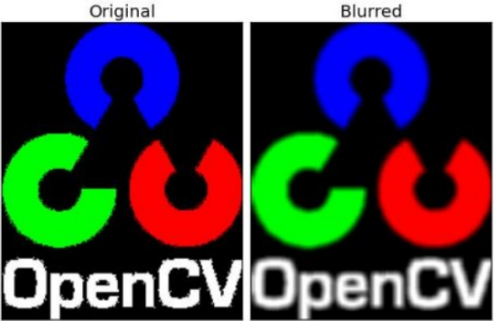

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('opencv.jpg')

blur = cv2.blur(img,(5,5))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

**также есть похожий алгоритм. Двусторонняя фильтрация**